# Applied Statistics Assessment

In [26]:
# Numerical structures and operations.
# https://numpy.org/doc/stable/reference/index.html#reference
import numpy as np

# Mathematical functions from the standard library.
# https://docs.python.org/3/library/math.html
import math

# Permutations and combinations.
# https://docs.python.org/3/library/itertools.html
import itertools

# Random selections.
# https://docs.python.org/3/library/random.html
import random

# Plotting.
# https://matplotlib.org/stable/contents.html
import matplotlib.pyplot as plt

## Problem 1: Extending the Lady Tasting Tea

Let's extend the Lady Tasting Tea experiment as follows. The original experiment has 8 cups: 4 tea-first and 4 milk-first. Suppose we prepare 12 cups: 8 tea-first and 4 milk-first. A participant claims they can tell which was poured first.

Simulate this experiment using numpy by randomly shuffling the cups many times and calculating the probability of the participant correctly identifying all cups by chance. Compare your result with the original 8-cup experiment.

In your notebook, explain your simulation process clearly, report and interpret the estimated probability, and discuss whether, based on this probability, you would consider extending or relaxing the p-value threshold compared to the original design.

In [2]:
# Number of cups of tea in total.
no_cups = 12

# Number of cups of tea with milk in first.
no_cups_milk_first = 8

#Number of cups of tea with tea in first.
no_cups_tea_first = 4

In [3]:
# Number of ways of selecting four cups from eight.
ways = math.comb(no_cups, no_cups_milk_first)

# Show.
ways

495

In [4]:
# Total number of ways of selecting eight cups from twelve, keeping them in order.
ways_ordered = 12 * 11 * 10 * 9 *8 * 7 * 6 * 5 

# Show.
ways_ordered



19958400

In [5]:
# No of ways of shuffling eight cups.
no_shuffles = 8 * 7 * 6 * 5 * 4 * 3 * 2 * 1

# Show.
no_shuffles



40320

In [6]:
# No of combinations.
no_combs = ways_ordered // no_shuffles

# Show.
no_combs

495

In [7]:
# Number of cups of tea in total.
n = 12

In [8]:
# Number of cups of tea with milk in first.
k = 8

In [ ]:
# Twelve factorial.
math.factorial(n)

479001600

In [ ]:
# Eight factorial.
math.factorial(k)

40320

In [11]:
# Four factorial.
math.factorial(n - k)

24

In [12]:
# No of ways of selecting k objects from n without replacement and without order.
math.factorial(n) // (math.factorial(k) * math.factorial(n - k))

495

In [13]:
# The cup labels.
labels = list(range(no_cups))

# Show.
labels

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

In [16]:
# Show the different ways of selecting no_cups_milk_first out of no_cups cups of tea.
combs = list(itertools.combinations(labels, no_cups_milk_first))

# Show.
combs

[(0, 1, 2, 3, 4, 5, 6, 7),
 (0, 1, 2, 3, 4, 5, 6, 8),
 (0, 1, 2, 3, 4, 5, 6, 9),
 (0, 1, 2, 3, 4, 5, 6, 10),
 (0, 1, 2, 3, 4, 5, 6, 11),
 (0, 1, 2, 3, 4, 5, 7, 8),
 (0, 1, 2, 3, 4, 5, 7, 9),
 (0, 1, 2, 3, 4, 5, 7, 10),
 (0, 1, 2, 3, 4, 5, 7, 11),
 (0, 1, 2, 3, 4, 5, 8, 9),
 (0, 1, 2, 3, 4, 5, 8, 10),
 (0, 1, 2, 3, 4, 5, 8, 11),
 (0, 1, 2, 3, 4, 5, 9, 10),
 (0, 1, 2, 3, 4, 5, 9, 11),
 (0, 1, 2, 3, 4, 5, 10, 11),
 (0, 1, 2, 3, 4, 6, 7, 8),
 (0, 1, 2, 3, 4, 6, 7, 9),
 (0, 1, 2, 3, 4, 6, 7, 10),
 (0, 1, 2, 3, 4, 6, 7, 11),
 (0, 1, 2, 3, 4, 6, 8, 9),
 (0, 1, 2, 3, 4, 6, 8, 10),
 (0, 1, 2, 3, 4, 6, 8, 11),
 (0, 1, 2, 3, 4, 6, 9, 10),
 (0, 1, 2, 3, 4, 6, 9, 11),
 (0, 1, 2, 3, 4, 6, 10, 11),
 (0, 1, 2, 3, 4, 7, 8, 9),
 (0, 1, 2, 3, 4, 7, 8, 10),
 (0, 1, 2, 3, 4, 7, 8, 11),
 (0, 1, 2, 3, 4, 7, 9, 10),
 (0, 1, 2, 3, 4, 7, 9, 11),
 (0, 1, 2, 3, 4, 7, 10, 11),
 (0, 1, 2, 3, 4, 8, 9, 10),
 (0, 1, 2, 3, 4, 8, 9, 11),
 (0, 1, 2, 3, 4, 8, 10, 11),
 (0, 1, 2, 3, 4, 9, 10, 11),
 (0, 1, 2, 3, 5, 6, 7, 8)

In [17]:
# Number of combinations.
len(combs)

495

In [20]:
# Select eight cups at random to put milk in first.
# https://docs.python.org/3/library/random.html#random.sample
labels_milk = random.sample(labels, 8)

# Sort, inplace.
labels_milk.sort()

# Show.
labels_milk

[0, 1, 2, 4, 6, 7, 10, 11]

In [21]:
# Turn labels_milk into a set.
# Uses: https://docs.python.org/3/tutorial/datastructures.html#sets
set(labels_milk)

{0, 1, 2, 4, 6, 7, 10, 11}

In [22]:
# Calculate the overlap between each element of combs and labels_milk.

no_overlaps = []

# Loop through the combinations.
for comb in combs:
  # Turn comb into a set.
  s1 = set(comb)
  # Turn labels_milk into a set.
  s2 = set(labels_milk)
  # Figure out where they overlap.
  overlap = s1.intersection(s2)
  # Show the combination and the overlap.
  print(comb, len(overlap), overlap)
  # Append overlap to no_overlaps.
  no_overlaps.append(len(overlap))

(0, 1, 2, 3, 4, 5, 6, 7) 6 {0, 1, 2, 4, 6, 7}
(0, 1, 2, 3, 4, 5, 6, 8) 5 {0, 1, 2, 4, 6}
(0, 1, 2, 3, 4, 5, 6, 9) 5 {0, 1, 2, 4, 6}
(0, 1, 2, 3, 4, 5, 6, 10) 6 {0, 1, 2, 4, 6, 10}
(0, 1, 2, 3, 4, 5, 6, 11) 6 {0, 1, 2, 4, 6, 11}
(0, 1, 2, 3, 4, 5, 7, 8) 5 {0, 1, 2, 4, 7}
(0, 1, 2, 3, 4, 5, 7, 9) 5 {0, 1, 2, 4, 7}
(0, 1, 2, 3, 4, 5, 7, 10) 6 {0, 1, 2, 4, 7, 10}
(0, 1, 2, 3, 4, 5, 7, 11) 6 {0, 1, 2, 4, 7, 11}
(0, 1, 2, 3, 4, 5, 8, 9) 4 {0, 1, 2, 4}
(0, 1, 2, 3, 4, 5, 8, 10) 5 {0, 1, 2, 4, 10}
(0, 1, 2, 3, 4, 5, 8, 11) 5 {0, 1, 2, 4, 11}
(0, 1, 2, 3, 4, 5, 9, 10) 5 {0, 1, 2, 4, 10}
(0, 1, 2, 3, 4, 5, 9, 11) 5 {0, 1, 2, 4, 11}
(0, 1, 2, 3, 4, 5, 10, 11) 6 {0, 1, 2, 4, 10, 11}
(0, 1, 2, 3, 4, 6, 7, 8) 6 {0, 1, 2, 4, 6, 7}
(0, 1, 2, 3, 4, 6, 7, 9) 6 {0, 1, 2, 4, 6, 7}
(0, 1, 2, 3, 4, 6, 7, 10) 7 {0, 1, 2, 4, 6, 7, 10}
(0, 1, 2, 3, 4, 6, 7, 11) 7 {0, 1, 2, 4, 6, 7, 11}
(0, 1, 2, 3, 4, 6, 8, 9) 5 {0, 1, 2, 4, 6}
(0, 1, 2, 3, 4, 6, 8, 10) 6 {0, 1, 2, 4, 6, 10}
(0, 1, 2, 3, 4, 6, 8, 11) 6 {0, 1, 

In [23]:
# Show the overlaps.
print(no_overlaps)

[6, 5, 5, 6, 6, 5, 5, 6, 6, 4, 5, 5, 5, 5, 6, 6, 6, 7, 7, 5, 6, 6, 6, 6, 7, 5, 6, 6, 6, 6, 7, 5, 5, 6, 6, 5, 5, 6, 6, 4, 5, 5, 5, 5, 6, 4, 5, 5, 5, 5, 6, 4, 4, 5, 5, 5, 6, 6, 6, 6, 7, 5, 5, 6, 6, 5, 5, 6, 6, 5, 6, 6, 7, 7, 5, 6, 6, 6, 6, 7, 5, 6, 6, 6, 6, 7, 5, 5, 6, 6, 6, 7, 7, 7, 7, 8, 6, 6, 7, 7, 6, 6, 7, 7, 6, 5, 6, 6, 6, 6, 7, 5, 5, 6, 6, 5, 5, 6, 6, 5, 6, 6, 7, 7, 6, 6, 5, 5, 6, 6, 4, 5, 5, 5, 5, 6, 4, 5, 5, 5, 5, 6, 4, 4, 5, 5, 5, 6, 6, 6, 6, 7, 5, 5, 6, 6, 5, 5, 6, 6, 5, 4, 5, 5, 5, 5, 6, 4, 4, 5, 5, 4, 4, 5, 5, 4, 5, 5, 6, 6, 5, 5, 5, 6, 6, 6, 6, 7, 5, 5, 6, 6, 5, 5, 6, 6, 5, 6, 6, 7, 7, 6, 6, 5, 5, 6, 6, 5, 5, 6, 5, 5, 6, 6, 4, 5, 5, 5, 5, 6, 4, 5, 5, 5, 5, 6, 4, 4, 5, 5, 5, 6, 6, 6, 6, 7, 5, 5, 6, 6, 5, 5, 6, 6, 5, 4, 5, 5, 5, 5, 6, 4, 4, 5, 5, 4, 4, 5, 5, 4, 5, 5, 6, 6, 5, 5, 5, 6, 6, 6, 6, 7, 5, 5, 6, 6, 5, 5, 6, 6, 5, 6, 6, 7, 7, 6, 6, 5, 5, 6, 6, 5, 5, 6, 4, 5, 5, 5, 5, 6, 4, 4, 5, 5, 4, 4, 5, 5, 4, 5, 5, 6, 6, 5, 5, 4, 4, 5, 5, 4, 4, 5, 5, 5, 6, 6, 5, 5, 6, 5, 5, 5, 6, 

In [24]:
# Count the number of times each overlap occurs.
counts = np.unique(no_overlaps, return_counts=True)

# Show.
counts

(array([4, 5, 6, 7, 8]), array([ 70, 224, 168,  32,   1]))

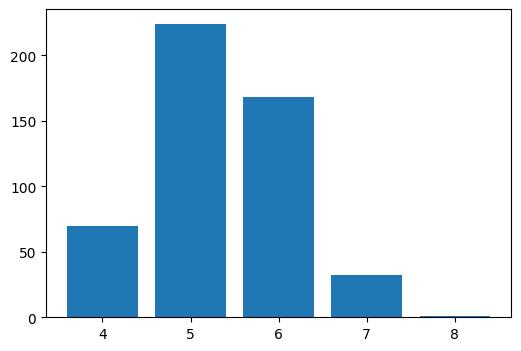

In [27]:
# Create a figure.
fig, ax = plt.subplots(figsize=(6, 4))

# Bar chart.
ax.bar(counts[0], counts[1]);

### The Null Hypothesis
The lady has no special power to tell the difference between cups of tea with milk in first and cups of tea with tea in first.

The lady is selecting the four cups from the eight cups at random.

### Alternative Hypothesis

The lady can tell the difference.

## Problem 2: Normal Distribution

## Problem 3: t-Tests

## Problem 4: ANOVA

# End